In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the dataset
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
#Check the head
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Description of the variables
    Pregnancies:-      Number of times pregnant
        Glucose:-      Plasma glucose concentration a 2 hours in an oral glucose tolerance test
      BloodPressure:-  Diastolic blood pressure (mm Hg)
      SkinThickness:-  Triceps skin fold thickness (mm)
            Insulin:-  2-Hour serum insulin (mu U/ml)
                BMI:-  Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction:- Diabetes pedigree function

In [4]:
#Check the structure of dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Check summary statistics of the dataset
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#Check for any null values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Initial observation there is no null values, but some of the parameters have 0 as min value. So lets check those

In [3]:
for col in diabetes_data.iloc[:,:-3].columns:
    x = diabetes_data[diabetes_data[col]==0.0].count()[col]
    x_percent = np.round(x/len(diabetes_data),2)
    print("{0:25} {1}".format(col,x_percent))

Pregnancies               0.14
Glucose                   0.01
BloodPressure             0.05
SkinThickness             0.3
Insulin                   0.49
BMI                       0.01


SkinThickness and Insulin has 30% and 49% of the rows with zero values. So can impute with median value

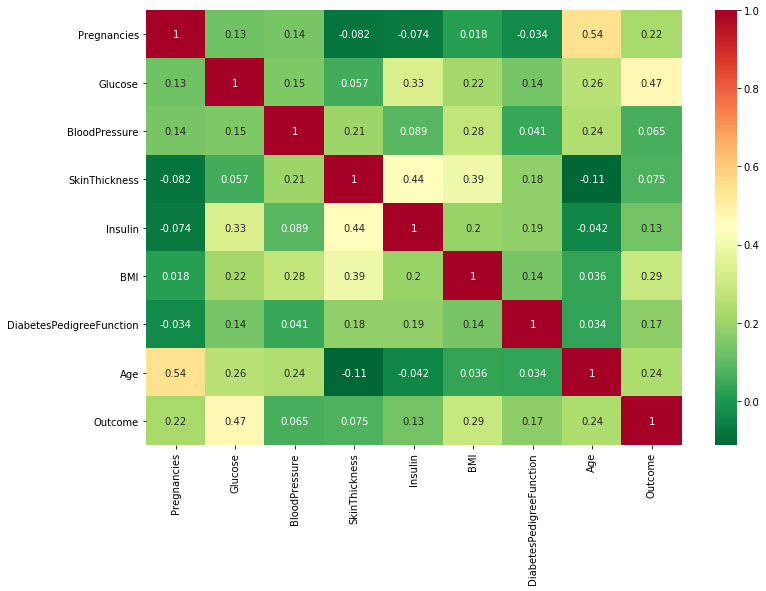

In [74]:
#Plot correlation and check whether SkinThickness and Insulin correlated with any other variable
corr = diabetes_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="RdYlGn_r")

Correlation shows they are not highly correlated with any of the variables

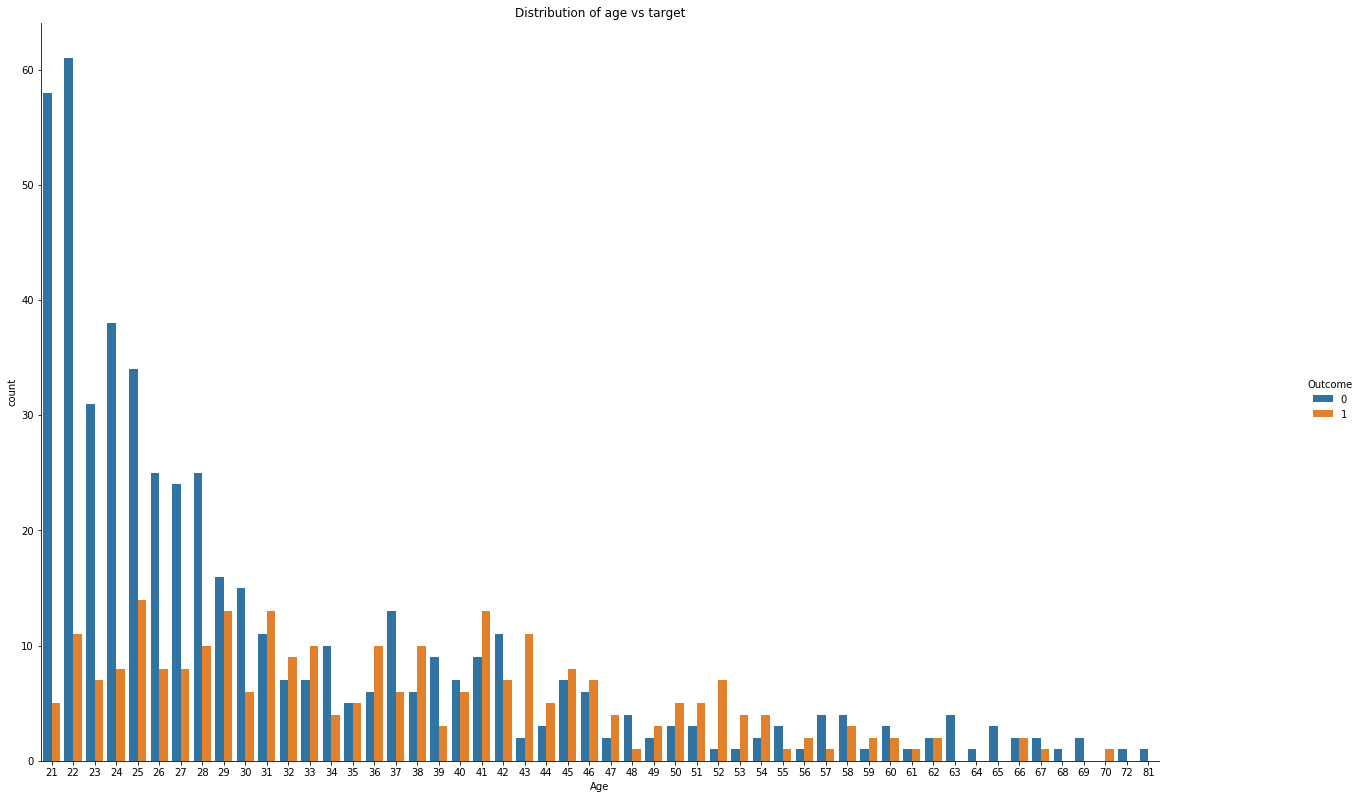

In [78]:
#Distribution of age vs target 
#plt.figure(figsize=(20,12))
sns.catplot(data=diabetes_data, x='Age', hue='Outcome', kind='count', order=diabetes_data['Age'].sort_values().unique())
plt.title('Distribution of age vs target')
plt.gcf().set_size_inches(20, 12)
plt.show()

Plot shows diabetes is more common in young people ie age < 50

### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = diabetes_data.drop('Outcome',axis=1)
y = diabetes_data['Outcome']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=99)

In [5]:
x_train.shape

(614, 8)

In [6]:
#Impute the variable having zero with median value
from sklearn.preprocessing import Imputer

cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
imputer = Imputer(missing_values=0,strategy='median')
x_train[cols] = imputer.fit_transform(x_train[cols])
x_test[cols] = imputer.transform(x_test[cols])

C:\Users\shahe\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Featue scaling


In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model Training

In [148]:
#import the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [135]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train_scaled,y_train)

log_predict = log_model.predict(x_test_scaled)

print(classification_report(y_test,log_predict))
print('\n')
print("Accuracy:- {:.2f}%".format(round(accuracy_score(y_test,log_predict),3)*100))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.69      0.59      0.64        49

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



Accuracy:- 78.60%


In [144]:
#Logistic Regression
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_scaled,y_train)

svm_predict = svm_model.predict(x_test_scaled)

print(classification_report(y_test,svm_predict))
print('\n')
print("Accuracy:- {:.2f}%".format(round(accuracy_score(y_test,svm_predict),3)*100))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.70      0.61      0.65        49

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



Accuracy:- 79.20%


In [139]:
#Logistic Regression
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train,y_train)

dtree_predict = dtree_model.predict(x_test)

print(classification_report(y_test,dtree_predict))
print('\n')
print("Accuracy:- {:.2f}%".format(round(accuracy_score(y_test,dtree_predict),3)*100))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       105
           1       0.48      0.59      0.53        49

    accuracy                           0.66       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.69      0.66      0.67       154



Accuracy:- 66.20%


In [140]:
#Random Forest
rf_model = RandomForestClassifier(random_state=99)
rf_model.fit(x_train,y_train)

rf_predict = rf_model.predict(x_test)

print(classification_report(y_test,rf_predict))
print('\n')
print("Accuracy:- {:.2f}%".format(round(accuracy_score(y_test,rf_predict),3)*100))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.61      0.57      0.59        49

    accuracy                           0.75       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.74      0.75      0.74       154



Accuracy:- 74.70%


In [229]:
#Gradient
gbm_model = GradientBoostingClassifier(random_state=99)
gbm_model.fit(x_train,y_train)

gbm_predict = gbm_model.predict(x_test)

print(classification_report(y_test,gbm_predict))
print('\n')
print("Accuracy:- {:.2f}%".format(round(accuracy_score(y_test,gbm_predict),3)*100))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.66      0.67      0.67        49

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154



Accuracy:- 78.60%


In [333]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 138)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(1, 16, num = 15)]
# max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 100, num = 97)]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 100, num = 97)]

# Create the random grid
random_grid = {#'n_estimators': n_estimators,
               'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf
              }


rf_model = RandomForestClassifier(n_estimators=46,
                                  max_depth=3,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  random_state=99)
rf_random = GridSearchCV(estimator = rf_model,
                               param_grid = random_grid,
                               scoring='accuracy', 
                               #n_iter = 20, 
                               cv = 5, 
                               verbose=6,
                               #random_state=99, 
                               n_jobs = -1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=46, n_jobs=None,
                                              oob_score=False, random_state=99,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_featu

In [334]:
rf_random.best_params_


{'max_features': 'auto'}

In [335]:
y_pred = rf_random.predict(x_test)

In [336]:
print(classification_report(y_test,y_pred))
print('\n')
print("Accuracy:- {:.2f}%".format(round(accuracy_score(y_test,y_pred),3)*100))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.74      0.53      0.62        49

    accuracy                           0.79       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.79      0.79      0.78       154



Accuracy:- 79.20%


In [344]:
import pickle
file = open('diabetes_rf.pkl','wb')
pickle.dump(rf_random,file)

In [11]:
import pickle

saved_model = pickle.load(open('diabetes_rf.pkl','rb'))
y_pred = saved_model.predict(x_test)